In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import pingouin as pg

In [5]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

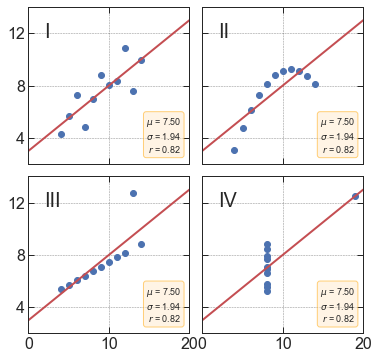

In [6]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

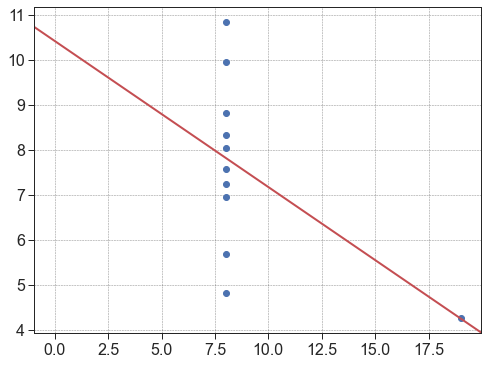

In [7]:
    p1, p0 = np.polyfit(x, y1, deg=1)  # slope, intercept
    plt.plot(x, y1, 'o')
    plt.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

In [8]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]

In [9]:
data1=pd.DataFrame({'x1':x, 'residual data 1':y1})
data1

,x1,residual data 1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In [10]:
data2=pd.DataFrame({'x2':x, 'residual data 2':y2})
data2

,x2,residual data 2
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


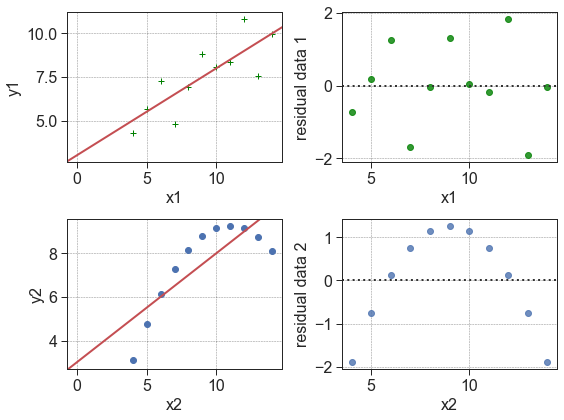

In [11]:
fig, axes = plt.subplots(2,2)
p1, p0 = np.polyfit(x, y1, deg=1)  # slope, intercept
axes[0][0].plot(x, y1, '+', color='green', label='data 1')
axes[0][0].axline(xy1=(0, p0), slope=p1, color='r', lw=2)
axes[0][0].set_xlabel('x1')
axes[0][0].set_ylabel('y1')
sns.residplot(x='x1', y='residual data 1', data=data1, ax=axes[0][1], color='green')

p1, p0 = np.polyfit(x, y2, deg=1)  # slope, intercept
axes[1][0].plot(x, y2, 'o')
axes[1][0].axline(xy1=(0, p0), slope=p1, color='r', lw=2)
axes[1][0].set_xlabel('x2')
axes[1][0].set_ylabel('y2')
sns.residplot(x='x2', y='residual data 2', data=data2, ax=axes[1][1])
plt.tight_layout()

## Model 1

In [12]:
import statsmodels.api as sm

In [13]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
x=np.array(x)
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y1=np.array(y1)
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y2=np.array(y2)

In [14]:
model_1 = sm.OLS(y1,  sm.add_constant(x)).fit() 
model_1.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 18 Jun 2023   Prob (F-statistic):            0.00217
Time:                        16:04:13   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
data1_hat=model_1.params[1]*(x) + model_1.params[0]
data1_hat

array([ 8.001     ,  7.00081818,  9.50127273,  7.50090909,  8.50109091,
       10.00136364,  6.00063636,  5.00045455,  9.00118182,  6.50072727,
        5.50054545])

In [16]:
res1=y1-data1_hat

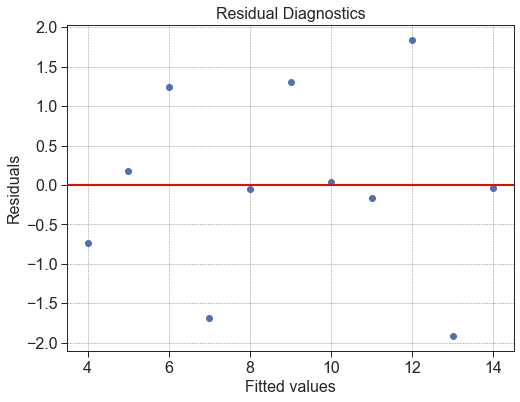

In [17]:
plt.scatter(x, res1)
plt.axhline(0, color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Diagnostics')
plt.show()

## Model 2

In [18]:
model_2 = sm.OLS(y2,  sm.add_constant(x)).fit() 
model_2.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 18 Jun 2023   Prob (F-statistic):            0.00218
Time:                        16:04:15   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.026       0.455       5.547
x1             0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
data2_hat=model_2.params[1]*(x) + model_2.params[0]
res2=y2-data2_hat

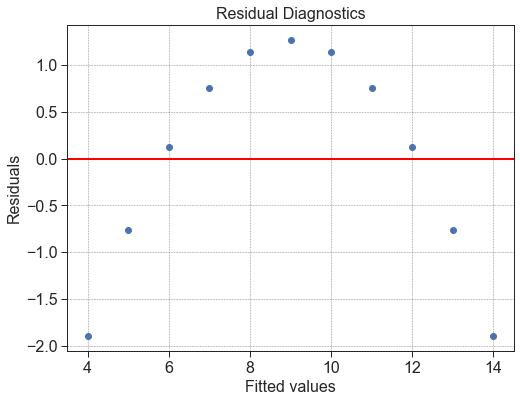

In [20]:
plt.scatter(x, res2)
plt.axhline(0, color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Diagnostics')
plt.show()

In [21]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [22]:
plt.style.use(['notebook', 'grid'])

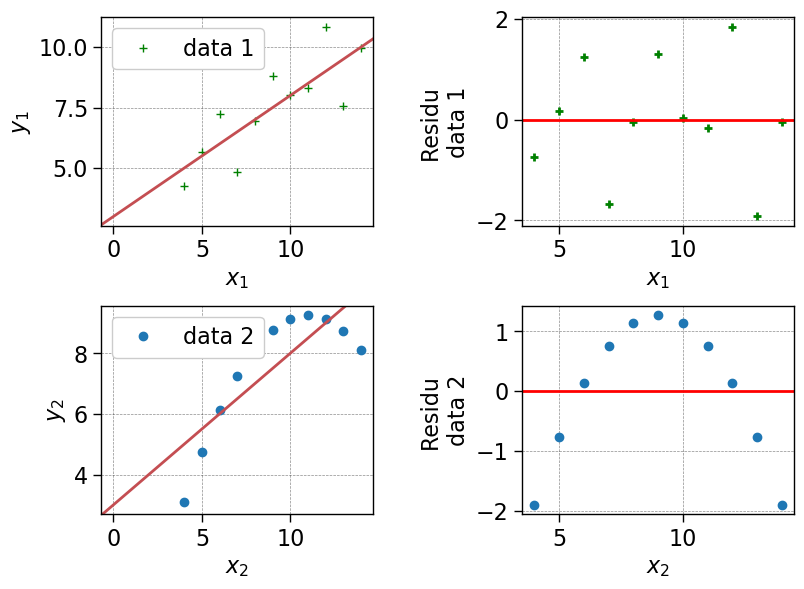

In [23]:
fig, axes = plt.subplots(2,2)
####################
axes[0][0].plot(x, y1, '+', color='green', label='data 1')
axes[0][0].axline(xy1=(0, p0), slope=p1, color='r', lw=2)
axes[0][0].set_xlabel(r'$x_1$')
axes[0][0].set_ylabel(r'$y_1$')

axes[0][1].scatter(x, res1, marker='+', color='green', label='data 1')
axes[0][1].axhline(0, color='red')
axes[0][1].set_xlabel(r'$x_1$')
axes[0][1].set_ylabel('Residu \ndata 1')
axes[0][0].legend(loc='upper left')

###################
axes[1][0].plot(x, y2, 'o', label='data 2')
axes[1][0].axline(xy1=(0, p0), slope=p1, color='r', lw=2)
axes[1][0].set_xlabel(r'$x_2$')
axes[1][0].set_ylabel(r'$y_2$')

axes[1][1].scatter(x, res2, label='data 2')
axes[1][1].axhline(0, color='red')
axes[1][1].set_xlabel(r'$x_2$')
axes[1][1].set_ylabel('Residu \ndata 2')
axes[1][0].legend(loc='upper left')

####################
plt.subplots_adjust(left=0.51,
                    bottom=0.5,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.tight_layout()


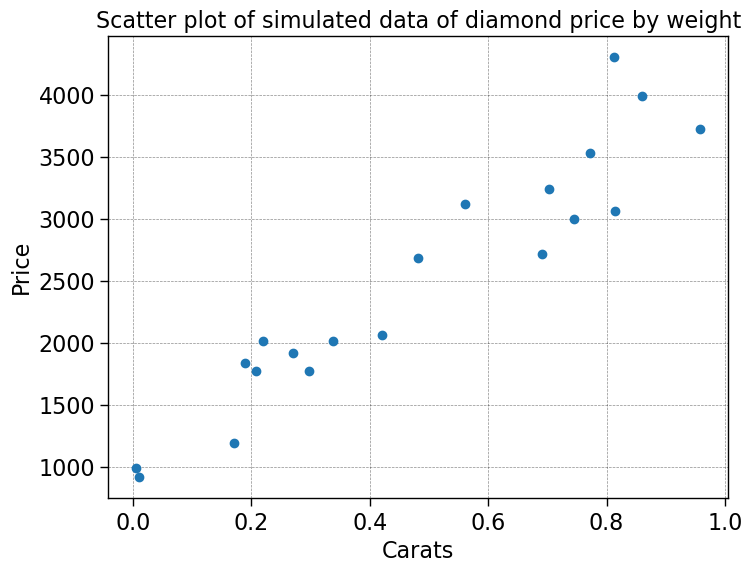

In [24]:
ran_gen=np.random.RandomState(22)
weight=ran_gen.rand(20)
price=3721*weight + 1300*ran_gen.rand(20)
plt.scatter(weight, price)
plt.xlabel('Carats')
plt.ylabel('Price')
plt.title('Scatter plot of simulated data of diamond price by weight')
plt.show()

In [25]:
diamonds=pd.DataFrame({'Weight':weight,
                      'Price':price })
diamonds=diamonds.sort_values(by=['Weight']).reset_index(drop=True)
diamonds.tail(5)

,Weight,Price
15,0.772044,3533.292458
16,0.811951,4306.821531
17,0.813726,3065.674398
18,0.859182,3996.783789
19,0.957832,3730.927570


In [26]:
x = diamonds['Weight']
y = diamonds['Price']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           2.12e-10
Time:                        16:04:29   Log-Likelihood:                -142.89
No. Observations:                  20   AIC:                             289.8
Df Residuals:                      18   BIC:                             291.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1008.1051    138.002      7.305      0.000     718.174    1298.036
Weight      3123.9446    246.743     12.661      0.000    2605.556    3642.333
==============================================================================
Omnibus:                        1.136   Durbin-Watson:                   2.672
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.628
Skew:                           0.431   Prob(JB):                        0.731
Kurtosis:                       2.898   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$
{\mathbf x}_{\mathbf1}
$

In [27]:
price_hat=model.params.Weight*diamonds['Weight'] + model.params.const

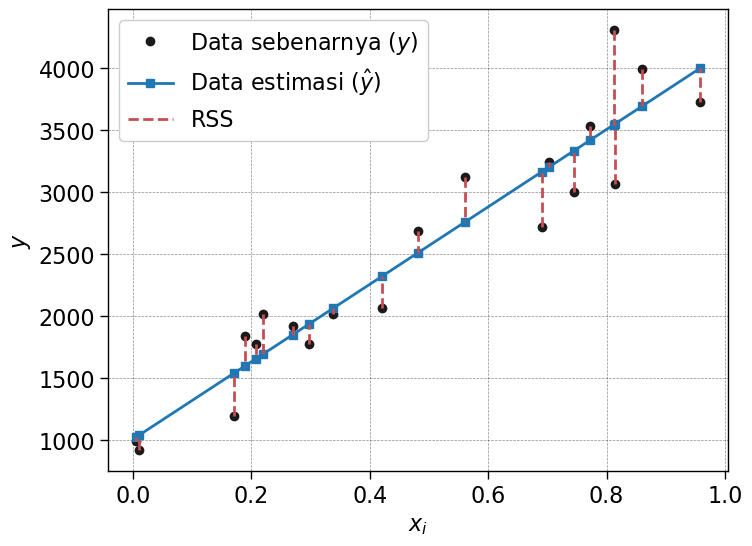

In [28]:
plt.plot(diamonds['Weight'],diamonds['Price'],'ko',markerfacecolor='k')
plt.plot(diamonds['Weight'],price_hat,'s-')

for i in range(diamonds.shape[0]):
    plt.plot([diamonds['Weight'][i],diamonds['Weight'][i]],[diamonds['Price'][i], price_hat[i]],'r--') 
    

plt.legend(('Data sebenarnya ($y$)','Data estimasi ($\^{y}$)','RSS'))


plt.xlabel(r"$ x_i$ ")
plt.ylabel(r'$ y $')
plt.show()  